# Histogram-based Image Enhancement

Image Processing techniques take advantage of mathematical operations to enhance qualtity of images.  This lab covers following topics

- Histogram & Masking 
- Histogram Equalization
- Adaptive histogram equalization

!!! Last lab, we used openCV function <code>cv.calcHist()</code> to find the histogram of the full image. \
What if you want to find histograms of some regions of an image? Just create a mask image with white color on the region you want to find histogram and black otherwise. Then pass this as the mask. 

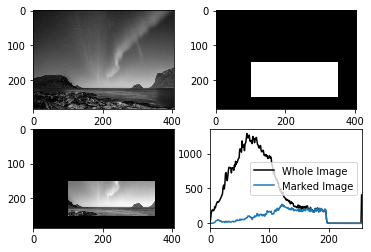

In [9]:
img = cv2.imread('../images/p04/middle_key.png',0)

# create a retangular mask of 1 
mask = np.zeros(img.shape[:2], np.uint8)
mask[150:250, 100:350] = 1
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask

hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img,'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full, color = 'k', label = 'Whole Image'),
plt.plot(hist_mask,label = 'Marked Image')
plt.xlim([0,256])
plt.legend()
plt.show()

### Histogram equalization (HE)

Histogram equalization is a non-linear contrast enhancement technique that redistributs an image's histogram to produce a uniform distribition. This process increases the contrast of the image, especially in areas with low local contrast. 

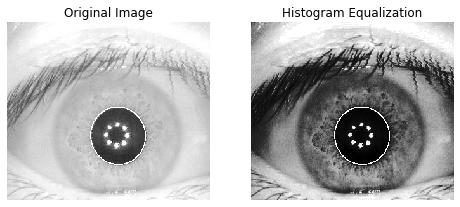

In [21]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('../images/p04/iris_Led.png',0)
equ = cv2.equalizeHist(image)

plt.figure(figsize=[8,8])
plt.subplot(221), plt.imshow(image,'gray'), plt.title("Original Image"), plt.axis('off')
plt.subplot(222), plt.imshow(equ,'gray'), plt.title("Histogram Equalization")
plt.axis('off')
plt.show()

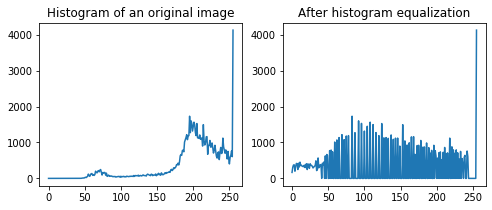

In [29]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
eq_hist = cv2.calcHist([equ], [0], None, [256], [0, 256])

plt.figure(figsize=[8,3])
plt.gray()

plt.subplot(121), plt.plot(hist), plt.title("Histogram of an original image")
plt.subplot(122), plt.plot(eq_hist), plt.title("After histogram equalization")
plt.show()

#plt.subplot(121)
#plt.plot(hist)
#plt.subplot(122)
#plt.plot(eq_hist);plt.title('After histogram equalization')
#plt.show()

# Adaptive histogram equalization
In this, image is divided into small blocks called “tiles” (tileSize is 8x8 by default in OpenCV). \
Then each of these blocks are histogram equalized as usual. 
So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified.\ 
To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. \
After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

To apply adaptive histogram equalization, we use the class:

**cv.CLAHE (clipLimit = 40, tileGridSize = new cv.Size(8, 8))**

#### Parameters
clipLimit	threshold for contrast limiting.\
tileGridSize	size of grid for histogram equalization. \
Input image will be divided into equally sized rectangular tiles. tileGridSize defines the number of tiles in row and column.

In [32]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('../images/p04/clahe_1.jpg',0)

equ = cv2.equalizeHist(image)

In [33]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(image)

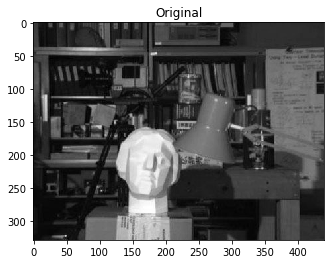

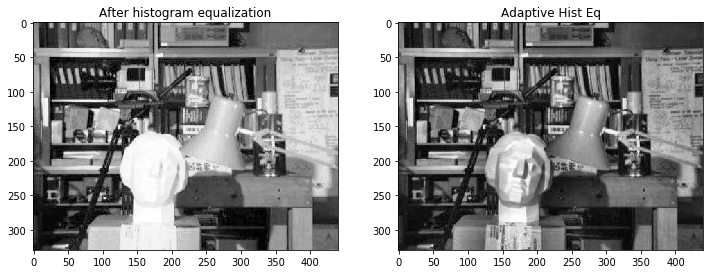

In [34]:

plt.imshow(image, cmap='gray');plt.title('Original')
plt.show()
plt.figure(figsize=[12,10])
plt.subplot(121)
plt.imshow(equ, cmap='gray');plt.title('After histogram equalization')
plt.subplot(122)
plt.imshow(cl1, cmap='gray');plt.title('Adaptive Hist Eq')
plt.show()

In [39]:
# URLs that contain various types of images
# https://www.imageprocessingplace.com/root_files_V3/image_databases.htm
# https://www.cs.cmu.edu/afs/cs/project/cil/www/v-images.html